In [1]:
import pandas as pd
import re
import numpy as np

# change ccl name to ModelID

In [55]:
Model1960_df = pd.read_csv("/root/data/CCLE/Model Metadata describing all cancer models and cell lines depmap .csv",
    sep=",", index_col=0)
Model1960_df["COSMICID"]=Model1960_df["COSMICID"].apply(lambda x: str(int(x)) if pd.notnull(x) and np.isfinite(x) else np.nan)#Converts valid numeric IDs to strings
Model1960_df['CellLineName'] = (
    Model1960_df['CellLineName'] 
    .str.strip()                # 去除前後空白
    .str.lower()               # 全部轉成小寫
    .str.replace('_', '', regex=False)  # 移除底線
    .str.replace('-', '', regex=False)  # 移除連字號
    .str.replace(':', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace('/', '', regex=False)
    .str.replace(' ', '', regex=False)
    )
Model1960_df

,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,LegacySubSubtype,...,EngineeredModel,TissueOrigin,ModelDerivationMaterial,PublicComments,CCLEName,HCMIID,WTSIMasterCellID,SangerModelID,COSMICID,DateSharedIndbGaP
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,PT-gj46wT,nihovcar3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,high_grade_serous,...,NaN,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,2201.0,SIDM00105,905933,NaN
ACH-000002,PT-5qa3uk,hl60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,M3,...,NaN,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,55.0,SIDM00829,905938,NaN
ACH-000003,PT-puKIyc,caco2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,NaN,...,NaN,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,NaN,SIDM00891,NaN,NaN
ACH-000004,PT-q4K2cp,hel,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,M6,...,NaN,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,783.0,SIDM00594,907053,NaN
ACH-000005,PT-q4K2cp,hel9217,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,M6,...,NaN,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,SIDM00593,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003161,PT-or1hkT,abmt9430,ABMT9430,ZIMMPSC,Pancreas,Non-Cancerous,Immortalized Pancreatic Stromal Cells,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-003181,PT-W75e4m,nrhlms1,NRHLMS1,LMS,Soft Tissue,Leiomyosarcoma,Leiomyosarcoma,LMS,NaN,NaN,...,NaN,NaN,NaN,NaN,NRH-LMS1,NaN,NaN,NaN,NaN,NaN
ACH-003183,PT-BqidXH,nrhmfs3,NRHMFS3,MFS,Soft Tissue,Myxofibrosarcoma,Myxofibrosarcoma,MFS,NaN,NaN,...,NaN,NaN,NaN,NaN,NRH-MFS3,NaN,NaN,NaN,NaN,NaN


In [56]:
GDSCcosmic_df = pd.read_csv("/root/data/GDSC/Cell_Lines_name COSMIC.csv", sep=",")
GDSCcosmic_df["COSMIC_ID"]=GDSCcosmic_df["COSMIC_ID"].apply(lambda x: str(int(x)) if pd.notnull(x) and np.isfinite(x) else np.nan)#Converts valid numeric IDs to strings
GDSCcosmic_df.rename(columns={'COSMIC_ID': 'COSMICID'}, inplace=True)
GDSCcosmic_df['CellLineName'] = (
    GDSCcosmic_df['CellLineName'] 
    .str.strip()                # 去除前後空白
    .str.lower()               # 全部轉成小寫
    .str.replace('_', '', regex=False)  # 移除底線
    .str.replace('-', '', regex=False)  # 移除連字號
    .str.replace(':', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace('/', '', regex=False)
    .str.replace(' ', '', regex=False)
    )
GDSCcosmic_df

,CellLineName,synonyms,COSMICID,Site,Histology
0,ncih522,NaN,905944,lung,carcinoma
1,mewo,NaN,908128,skin,malignant_melanoma
2,c2bbe1,NaN,910700,large_intestine,carcinoma
3,hcc1428,NaN,1290905,breast,carcinoma
4,corl95,NaN,1297439,lung,carcinoma
...,...,...,...,...,...
1024,capan1,NaN,753624,pancreas,carcinoma
1025,mdamb435,NaN,905988,skin,malignant_melanoma
1026,ncih1944,NaN,1240185,lung,carcinoma
1027,ess1,NaN,907000,endometrium,carcinoma


In [57]:
Name_cosmic_map = GDSCcosmic_df.set_index('CellLineName')['COSMICID'].to_dict()
Model1960_df['COSMICID'] = Model1960_df.apply(
    lambda row: Name_cosmic_map[row['CellLineName']] if pd.isna(row['COSMICID']) and row['CellLineName'] in Name_cosmic_map else row['COSMICID'],
    axis=1)
COSMIC_to_Model = dict( zip(Model1960_df["COSMICID"], Model1960_df.index) )# 1. 建立 name → ID 的 mapping dict
print(len(COSMIC_to_Model))
print(len(Model1960_df['COSMICID'].unique()))

1020
1020


In [58]:
Name_to_Model = {}
for name, cosmic_id in Name_cosmic_map.items():
    model = COSMIC_to_Model.get(cosmic_id)
    if model is not None:
        Name_to_Model[name] = model

In [ ]:
import re
import pandas as pd
binary_df = pd.read_csv("/root/data/GDSC/Iorio lnIC50 265drug threshold binary matrix from GDSC.csv",
                               sep=",", index_col=0)
binary_df = binary_df.iloc[1:]
print(binary_df.shape)

# Compute base names 將.1.2.3去除 將(rescreen)去除
base_names = binary_df.columns.to_series().apply(lambda x: re.sub(r'\.\d+$', '', x)).str.replace(r'\(rescreen\)', '', regex=True).str.strip().str.replace(' ', '', regex=True)
print(f"Number of unique base names: {base_names.nunique()}")
# Track the last index of each base name
last_indices = {}#為了只取最大ID的藥，刪掉重複的藥物名稱
for idx, name in enumerate(base_names):
    last_indices.setdefault(name, []).append(idx)
print(f"Number of unique base names: {len(last_indices)}")
# Determine columns to keep: last index of each group
# columns_to_keep = [ binary_df.columns[idx_list[-1]]  for idx_list in last_indices.values()]
columns_to_keep = list(dict.fromkeys( binary_df.columns[idx_list[-1]] for idx_list in last_indices.values()))
print(f"Number of columns to keep: {len(columns_to_keep)}")
# Subset dataframe
df_clean = binary_df[columns_to_keep]
df_clean.columns = df_clean.columns.str.replace(r'\.\d+$', '', regex=True).str.replace(r'\(rescreen\)', '', regex=True).str.strip()#將.1.2.3去除
df_clean

(1001, 265)
Number of unique base names: 252
Number of unique base names: 252
Number of columns to keep: 252


,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,VX-680,...,UNC1215,SGC0946,XAV 939,Trametinib,Dabrafenib,Temozolomide,Bleomycin (50 uM),SN-38,Selumetinib,MLN4924
Screened Compounds:,,,,,,,,,,,,,,,,,,,,,
697,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22RV1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23132-87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YH-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
YKG-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YMB-1-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#print the keys that its value list length is >1 in dict last_indices
duplicate_keys = [key for key, idx_list in last_indices.items() if len(idx_list) > 1]
print("Base names with multiple occurrences:", duplicate_keys)

Base names with multiple occurrences: ['BMS-536924', 'GSK269962A', 'Bicalutamide', 'CHIR-99021', 'AZD6482', 'JQ1', 'BMS-708163', 'UNC0638', 'RDEA119', 'Olaparib', 'Afatinib', 'PLX4720', 'GDC0941']


In [62]:
# 刪掉ccl沒有response紀錄
df_clean = df_clean.replace('', pd.NA)
df_clean = df_clean.replace('  ', pd.NA)
df_clean = df_clean.replace(' ', pd.NA)
nan_rows = df_clean[df_clean.isna().all(axis=1)]
nan_rows.index

Index(['BONNA-12', 'D-245MG', 'KO52', 'MHH-CALL-4', 'NCCIT', 'NCI-H660',
       'NCI-H740', 'RERF-LC-FM', 'SC-1', 'SNU-283', 'U-CH2'],
      dtype='object', name='Screened Compounds:')

In [63]:
df_clean = df_clean.dropna(how='all')
df_clean

,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,VX-680,...,UNC1215,SGC0946,XAV 939,Trametinib,Dabrafenib,Temozolomide,Bleomycin (50 uM),SN-38,Selumetinib,MLN4924
Screened Compounds:,,,,,,,,,,,,,,,,,,,,,
697,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22RV1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23132-87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YH-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
YKG-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YMB-1-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_clean.isna().sum().sum()

47100

In [65]:
df_clean.index = (
    df_clean.index.astype(str)
    .str.strip()                # 去除前後空白
    .str.lower()               # 全部轉成小寫
    .str.replace('_', '', regex=False)  # 移除底線
    .str.replace('-', '', regex=False)  # 移除連字號
    .str.replace(':', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.replace('/', '', regex=False)
    )

In [66]:
mapped_index = df_clean.index.map(Name_to_Model)# 
unmapped_names = df_clean.index[mapped_index.isna()]
print(unmapped_names.tolist())

[]


In [67]:
# 先映射，並保留未對應的項目為 NaN
df_clean['mapped_ModelID'] = df_clean.index.map(Name_to_Model)
# 印出沒對應到的 index（原本的名稱）
unmapped = df_clean[df_clean['mapped_ModelID'].isna()]
print("Unmapped index names (not found in Name_to_Model):")
print(unmapped.index.tolist())
# 只保留成功對應到的 rows
df_clean = df_clean[df_clean['mapped_ModelID'].notna()].copy()
# 將 mapped ModelID 設為新的 index
df_clean.index = df_clean['mapped_ModelID']
df_clean.drop(columns='mapped_ModelID', inplace=True)
df_clean

Unmapped index names (not found in Name_to_Model):
[]


,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,VX-680,...,UNC1215,SGC0946,XAV 939,Trametinib,Dabrafenib,Temozolomide,Bleomycin (50 uM),SN-38,Selumetinib,MLN4924
mapped_ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000070,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ACH-000905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ACH-002089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-000956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
ACH-000570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-002208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# 重複ACH-001321	ACH-000815

# 建立一個 value -> keys 的反向映射
from collections import defaultdict
value_to_keys = defaultdict(list)
for key, value in Name_to_Model.items():
    value_to_keys[value].append(key)
duplicates = {value: keys for value, keys in value_to_keys.items() if len(keys) > 1}
for value, keys in value_to_keys.items():
    if len(keys) > 1:
        print(f"Value '{value}' is shared by keys: {keys}")
# 印出
for value, keys in duplicates.items():
    print(f"Value: {value} is shared by keys: {keys}")


In [69]:
df_clean.index.isna().sum()# check if there is any NaN in index column

0

In [ ]:
df_clean_stack = df_clean.stack().reset_index()
df_clean_stack.columns = ['ModelID', 'drug_name', 'Label']
print(len(df_clean_stack['drug_name'].unique()))
print(len(df_clean_stack['ModelID'].unique()))
df_clean_stack

252
990


,Model_ID,drug_name,label
0,ACH-000070,Erlotinib,1.0
1,ACH-000070,Rapamycin,1.0
2,ACH-000070,Sunitinib,1.0
3,ACH-000070,PHA-665752,1.0
4,ACH-000070,MG-132,0.0
...,...,...,...
202375,ACH-000828,Dabrafenib,0.0
202376,ACH-000828,Temozolomide,0.0
202377,ACH-000828,Bleomycin (50 uM),0.0
202378,ACH-000828,SN-38,0.0


# match drug name

In [71]:
drug_df = pd.read_csv("/root/data/DAPL/share/GDSC_drug_merge_pubchem_dropNA_MACCS.csv", sep=",", index_col=0)
drug_df

,PATHWAY_NAME,synonyms,pathway_name,target,pubchem,Dataset,name,SMILES,MACCS166bits
DRUG_NAME,,,,,,,,,
(5z)-7-oxozeaenol,"Other, kinases","5Z-7-Oxozeaenol, LL-Z1640-2","Other, kinases",TAK1,9863776.0,GDSC1,(5z)-7-oxozeaenol,C[C@H]1C/C=C\C(=O)[C@H]([C@H](C/C=C/C2=C(C(=CC...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
5-fluorouracil,Other,5-FU,Other,Antimetabolite (DNA & RNA),3385.0,GDSC2,5-fluorouracil,Fc1c[nH]c(=O)[nH]c1=O,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
a-443654,PI3K/MTOR signaling,KIN001-139,PI3K/MTOR signaling,"AKT1, AKT2, AKT3",10172943.0,GDSC1,a-443654,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OC[C@H](CC4=C...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
a-770041,"Other, kinases",KIN001-111,"Other, kinases","LCK, FYN",9549184.0,GDSC1,a-770041,CC(=O)N1CCN(CC1)C2CCC(CC2)N3C4=NC=NC(=C4C(=N3)...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
a-83-01,Other,-,Other,TGFB,16218924.0,GDSC1,a-83-01,CC1=NC(=CC=C1)C2=NN(C=C2C3=CC=NC4=CC=CC=C34)C(...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
...,...,...,...,...,...,...,...,...,...
zibotentan,Other,"ZD4054, ZD-4054",Other,Endothelin-1 receptor (EDNRA),9910224.0,GDSC1,zibotentan,CC1=CN=C(C(=N1)OC)NS(=O)(=O)C2=C(N=CC=C2)C3=CC...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
z-llnle-cho,Other,"Z-L-Norleucine-CHO, Gamma-Secretase Inhibitor 1",Other,gamma-secretase,16760646.0,GDSC1,z-llnle-cho,CCCCC(C=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC(C...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
zm447439,Mitosis,"ZM-447439, ZM 447439",Mitosis,"AURKA, AURKB",9914412.0,GDSC2,zm447439,COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=C(C=C3)NC(=O)...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [72]:
def normalize(name):
    return (
        name.strip().lower()
        .replace('_', '')
        .replace('-', '')
        .replace(':', '')
        .replace('/', '')
        .replace('.', '')
        .replace(' ', '')
    )
# 建立 synonym → drug_name 的對應表
synonym_map = {}
# 對 drug_df 每一列處理
for _, row in drug_df.iterrows():
    main_name = row.name
    norm_main = normalize(main_name)
    synonym_map[norm_main] = main_name  # 自己也要對應自己
    if pd.notna(row['synonyms']):
        for s in row['synonyms'].split(', '):
            s_norm = normalize(s)
            synonym_map[s_norm] = main_name
len(synonym_map)

837

In [ ]:
# Step 2: 對 df2 中的 drug_name 做標準化後比對
df_clean_stack['drug_name_normalized'] = (
    df_clean_stack['drug_name'].astype(str).map(normalize))
print(len(df_clean_stack['drug_name_normalized'].unique()))
unmapped = df_clean_stack[df_clean_stack['drug_name_normalized'].isna()]['drug_name'].tolist()
print("Unmapped drug names:", unmapped)
print("len(df_clean_stack)",len(df_clean_stack))
df_clean_stack['mapped_name'] = df_clean_stack['drug_name_normalized'].map(synonym_map)
print("len(df_clean_stack)",len(df_clean_stack))
unmapped = df_clean_stack[df_clean_stack['mapped_name'].isna()]['drug_name']
# print("Unmapped drug names:", (unmapped.unique()))
print(len(df_clean_stack['mapped_name'].isna()))
print(len(df_clean_stack['mapped_name'].unique()))
# # Step 3: 篩選出有成功對應到的藥物名稱
print(len(df_clean_stack['ModelID'].unique()))
df_clean_stack = df_clean_stack[df_clean_stack['mapped_name'].notna()].copy()
print(len(df_clean_stack['ModelID'].unique()))
print(len(df_clean_stack['mapped_name'].unique()))
print("len(df_clean_stack)",len(df_clean_stack))

252
Unmapped drug names: []
len(df_clean_stack) 202380
len(df_clean_stack) 202380
202380
239
990
990
238
len(df_clean_stack) 191405


In [74]:
df_clean_stack

,Model_ID,drug_name,label,drug_name_normalized,mapped_name
0,ACH-000070,Erlotinib,1.0,erlotinib,erlotinib
1,ACH-000070,Rapamycin,1.0,rapamycin,rapamycin
2,ACH-000070,Sunitinib,1.0,sunitinib,sunitinib
3,ACH-000070,PHA-665752,1.0,pha665752,pha-665752
4,ACH-000070,MG-132,0.0,mg132,mg-132
...,...,...,...,...,...
202374,ACH-000828,Trametinib,0.0,trametinib,trametinib
202375,ACH-000828,Dabrafenib,0.0,dabrafenib,dabrafenib
202376,ACH-000828,Temozolomide,0.0,temozolomide,temozolomide
202378,ACH-000828,SN-38,0.0,sn38,sn-38


In [75]:
# Step 4: 替換成對應的標準 drug_name（但保留原始欄位順序）
df_clean_stack['drug_name'] = df_clean_stack['mapped_name']
# df_clean_stack.drop(columns=['drug_name_normalized', 'mapped_name'], inplace=True)
df_clean_stack

,Model_ID,drug_name,label,drug_name_normalized,mapped_name
0,ACH-000070,erlotinib,1.0,erlotinib,erlotinib
1,ACH-000070,rapamycin,1.0,rapamycin,rapamycin
2,ACH-000070,sunitinib,1.0,sunitinib,sunitinib
3,ACH-000070,pha-665752,1.0,pha665752,pha-665752
4,ACH-000070,mg-132,0.0,mg132,mg-132
...,...,...,...,...,...
202374,ACH-000828,trametinib,0.0,trametinib,trametinib
202375,ACH-000828,dabrafenib,0.0,dabrafenib,dabrafenib
202376,ACH-000828,temozolomide,0.0,temozolomide,temozolomide
202378,ACH-000828,sn-38,0.0,sn38,sn-38


In [76]:
len(set(df_clean_stack['drug_name']) &set(drug_df.index))

238

# add lnIC50 column to stack df

In [105]:
ic50DF = pd.read_csv("/root/data/GDSC/Natural log IC50 from GDSC(data不完整).csv", sep=",")
ic50DF.columns = ic50DF.iloc[3]
ic50DF = ic50DF.iloc[4:].reset_index(drop=True)
ic50DF.columns.values[0] = 'COSMICID'
ic50DF.columns.values[1] = 'ccl_name'
ic50DF

3,COSMICID,ccl_name,TL-2-105,TAK-715,CP466722,BMS-345541,Genentech Cpd 10,GSK429286A,Ruxolitinib,SB-715992,...,Salubrinal,Dasatinib,XMD8-85,Roscovitine,Lapatinib,Cyclopamine,VX-680,JW-7-52-1,Erlotinib,Rapamycin
0,910944,ALL-PO,1.41,2.11,-0.76,1.39,-1.4,3.68,3.08,-3.23,...,1.4,1.37,1.5,3.89,2.62,2.22,-1.52,-2.9,1.31,-1.75
1,1295741,AMO-1,3.36,3.05,1.72,2.19,1.54,3.54,2.99,-3.89,...,3.28,1.25,2.33,3.52,2.4,4.39,0.83,-1.85,2.76,-2.29
2,910692,COLO-668,3.4,3.1,3.07,1.23,0.31,3.57,3.73,-2.28,...,3.94,2.76,2.63,3.61,0.99,5.32,3.25,-1.38,1.79,-2.31
3,1297439,COR-L95,3.31,6.1,2.95,2.85,3.74,5.22,3.72,-0.93,...,4.38,3.41,3.75,5.32,3.3,5.05,3.42,-0.34,3.87,-0.1
4,906838,DG-75,3.65,3.11,2.18,1.59,2.44,5.3,4.15,-2.53,...,3.03,0.83,1.82,3.79,3.32,4.75,2.37,-1.49,3.32,-1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,906849,ECC12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.34,NaN,1.89,4.61,-2.23,5.47,NaN,NaN,-2.28,NaN
986,924189,KP-N-RT-BM-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.12,NaN,NaN,NaN,NaN,2.18,0.23,NaN,-1.5
987,949092,CP67-MEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.37,NaN,NaN,NaN,NaN,1.91,NaN,NaN,NaN
988,688022,NCI-H378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
def normalize_str(name):
    return (
        name.str.strip().str.lower()
        .str.replace('_', '', regex=False)
        .str.replace('-', '', regex=False)
        .str.replace(':', '', regex=False)
        .str.replace('/', '', regex=False)
        .str.replace('.', '', regex=False)
        .str.replace(' ', '', regex=False)
    )
ic50DF['ccl_name'] = (
   normalize_str(ic50DF['ccl_name']) )
    # .str.strip()                # 去除前後空白
    # .str.lower()               # 全部轉成小寫
    # .str.replace('_', '', regex=False)  # 移除底線
    # .str.replace('-', '', regex=False)  # 移除連字號
    # .str.replace(':', '', regex=False)
    # .str.replace('.', '', regex=False)
    # .str.replace('/', '', regex=False)
    # .str.replace(' ', '', regex=False)    )

In [ ]:
mapped=ic50DF['ccl_name'].map(Name_to_Model)
unmapped_names = ic50DF['ccl_name'][mapped.isna()]
print(unmapped_names.tolist())
ic50DF['ccl_name']=ic50DF['ccl_name'].map(Name_to_Model)
ic50DF = ic50DF.rename(columns={'ccl_name': 'ModelID'})
ic50DF.drop(columns=['COSMICID'], inplace=True)
ic50DF['ModelID'].nunique()# check if there is any NaN in ModelID column
ic50DF['ModelID'].nunique()
ic50DF = ic50DF.set_index((ic50DF.columns[0]))
ic50DF.columns = normalize_str(ic50DF.columns.astype(str))
ic50DF

[]


3,tl2105,tak715,cp466722,bms345541,genentechcpd10,gsk429286a,ruxolitinib,sb715992,zstk474,kin001102,...,salubrinal,dasatinib,xmd885,roscovitine,lapatinib,cyclopamine,vx680,jw7521,erlotinib,rapamycin
Model_ID,,,,,,,,,,,,,,,,,,,,,
ACH-002209,1.41,2.11,-0.76,1.39,-1.4,3.68,3.08,-3.23,-1.69,-0.72,...,1.4,1.37,1.5,3.89,2.62,2.22,-1.52,-2.9,1.31,-1.75
ACH-000838,3.36,3.05,1.72,2.19,1.54,3.54,2.99,-3.89,0.28,1.63,...,3.28,1.25,2.33,3.52,2.4,4.39,0.83,-1.85,2.76,-2.29
ACH-000803,3.4,3.1,3.07,1.23,0.31,3.57,3.73,-2.28,0.58,0.94,...,3.94,2.76,2.63,3.61,0.99,5.32,3.25,-1.38,1.79,-2.31
ACH-000743,3.31,6.1,2.95,2.85,3.74,5.22,3.72,-0.93,2.3,2.69,...,4.38,3.41,3.75,5.32,3.3,5.05,3.42,-0.34,3.87,-0.1
ACH-002232,3.65,3.11,2.18,1.59,2.44,5.3,4.15,-2.53,2.32,2.1,...,3.03,0.83,1.82,3.79,3.32,4.75,2.37,-1.49,3.32,-1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.34,NaN,1.89,4.61,-2.23,5.47,NaN,NaN,-2.28,NaN
ACH-000345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.12,NaN,NaN,NaN,NaN,2.18,0.23,NaN,-1.5
ACH-002098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.37,NaN,NaN,NaN,NaN,1.91,NaN,NaN,NaN


In [108]:
# Compute base names 將.1.2.3去除 將(rescreen)去除
base_names = ic50DF.columns.astype(str).to_series().str.replace(r'\(rescreen\)', '', regex=True).str.strip().str.replace(' ', '', regex=True).apply(lambda x: re.sub(r'\.\d+$', '', x))
print(f"Number of unique base names: {base_names.nunique()}")
# Track the last index of each base name
last_indices = {}# Map: base_name -> 最後出現的 index
for idx, name in enumerate(base_names):
    last_indices[name] = idx  # overwrite to keep only the last occurrence
print(f"Number of unique base names: {len(last_indices)}")
# 取得要保留的欄位索引（真正的原始欄位名）
columns_to_keep = [ic50DF.columns[idx] for idx in last_indices.values()]
print(f"Number of columns to keep: {len(columns_to_keep)}")
# Subset dataframe
ic50DF_clean = ic50DF[columns_to_keep]
ic50DF_clean.columns = ic50DF_clean.columns.str.replace(r'\(rescreen\)', '', regex=True).str.strip().str.replace(r'\.\d+$', '', regex=True)#將.1.2.3去除
ic50DF_clean

Number of unique base names: 251
Number of unique base names: 251
Number of columns to keep: 251


3,tl2105,tak715,cp466722,bms345541,genentechcpd10,gsk429286a,ruxolitinib,sb715992,zstk474,kin001102,...,salubrinal,dasatinib,xmd885,roscovitine,lapatinib,cyclopamine,vx680,jw7521,erlotinib,rapamycin
Model_ID,,,,,,,,,,,,,,,,,,,,,
ACH-002209,1.41,2.11,-0.76,1.39,-1.4,3.68,3.08,-3.23,-1.69,-0.72,...,1.4,1.37,1.5,3.89,2.62,2.22,-1.52,-2.9,1.31,-1.75
ACH-000838,3.36,3.05,1.72,2.19,1.54,3.54,2.99,-3.89,0.28,1.63,...,3.28,1.25,2.33,3.52,2.4,4.39,0.83,-1.85,2.76,-2.29
ACH-000803,3.4,3.1,3.07,1.23,0.31,3.57,3.73,-2.28,0.58,0.94,...,3.94,2.76,2.63,3.61,0.99,5.32,3.25,-1.38,1.79,-2.31
ACH-000743,3.31,6.1,2.95,2.85,3.74,5.22,3.72,-0.93,2.3,2.69,...,4.38,3.41,3.75,5.32,3.3,5.05,3.42,-0.34,3.87,-0.1
ACH-002232,3.65,3.11,2.18,1.59,2.44,5.3,4.15,-2.53,2.32,2.1,...,3.03,0.83,1.82,3.79,3.32,4.75,2.37,-1.49,3.32,-1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.34,NaN,1.89,4.61,-2.23,5.47,NaN,NaN,-2.28,NaN
ACH-000345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.12,NaN,NaN,NaN,NaN,2.18,0.23,NaN,-1.5
ACH-002098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.37,NaN,NaN,NaN,NaN,1.91,NaN,NaN,NaN


In [109]:
dups = ic50DF_clean.columns[ic50DF_clean.columns.duplicated()]
print("❗ Still duplicated columns after cleaning:", dups.tolist())

❗ Still duplicated columns after cleaning: []


In [110]:
ic50DF.columns.name = None
ic50DF.columns = normalize_str(ic50DF.columns.to_series())# Step 2: Normalize df2.columns

In [111]:
ic50DF.columns.name

In [112]:
set(df_clean_stack["drug_name_normalized"]) -set(ic50DF.columns)

set()

In [ ]:
# Step 3: Perform lookup using ModelID and drug_name_norm
df_clean_stack["lnIC50"] = df_clean_stack.apply(
    lambda row: ic50DF.at[row["ModelID"], row["drug_name_normalized"]]
    if row["ModelID"] in ic50DF.index and row["drug_name_normalized"] in ic50DF.columns
    else np.nan,
    axis=1)

In [ ]:
df_clean_stack = df_clean_stack.rename(columns={'Model_ID': 'ModelID'})
df_clean_stack = df_clean_stack.rename(columns={'label': 'Label'})
df_clean_stack # lorio GDSC1 lnIC50 binary 191405 CCL990drug238 stack.csv #28個cancerType

,ModelID,drug_name,Label,drug_name_normalized,mapped_name,LNic50
0,ACH-000070,erlotinib,1.0,erlotinib,erlotinib,0.69
1,ACH-000070,rapamycin,1.0,rapamycin,rapamycin,-5.32
2,ACH-000070,sunitinib,1.0,sunitinib,sunitinib,-0.44
3,ACH-000070,pha-665752,1.0,pha665752,pha-665752,1.65
4,ACH-000070,mg-132,0.0,mg132,mg-132,-1.7
...,...,...,...,...,...,...
202374,ACH-000828,trametinib,0.0,trametinib,trametinib,3.91
202375,ACH-000828,dabrafenib,0.0,dabrafenib,dabrafenib,5.28
202376,ACH-000828,temozolomide,0.0,temozolomide,temozolomide,7.31
202378,ACH-000828,sn-38,0.0,sn38,sn-38,0.91


In [119]:
print(len(df_clean_stack['ModelID'].unique()))
print(len(df_clean_stack['drug_name'].unique()))

990
238


# add cancerType column

In [ ]:
# response_df = df_clean_stack.set_index('ModelID', inplace=True)
ccle_sample_info_df = pd.read_csv("../../data/DAPL/share/ccle_sample_info_df.csv", index_col=0, header=0)#32種cancertype
xena_sample_info_df = pd.read_csv("../../data/DAPL/share/xena_sample_info_df.csv", index_col=0, header=0)#33種cancertype
ccle_df= pd.read_csv("../../data/DAPL/share/ccle_uq1000_feature.csv", index_col=0, header=0)
xena_df= pd.read_csv("../../data/DAPL/share/tcga Exp 1426genes.csv", index_col=0, header=0)
ccle_df.index = ccle_df.index.astype(str)
xena_df.index = xena_df.index.astype(str)
ccle_sample_info_df.index = ccle_sample_info_df.index.astype(str)
xena_sample_info_df.index = xena_sample_info_df.index.astype(str)

In [154]:
xena_sample_info_df['_primary_disease'].unique()

array(['skin cutaneous melanoma', 'thyroid carcinoma', 'sarcoma',
       'prostate adenocarcinoma', 'pheochromocytoma & paraganglioma',
       'pancreatic adenocarcinoma', 'head & neck squamous cell carcinoma',
       'esophageal carcinoma', 'colon adenocarcinoma',
       'cervical & endocervical cancer', 'breast invasive carcinoma',
       'testicular germ cell tumor', 'kidney papillary cell carcinoma',
       'kidney clear cell carcinoma', 'acute myeloid leukemia',
       'rectum adenocarcinoma', 'ovarian serous cystadenocarcinoma',
       'lung adenocarcinoma', 'liver hepatocellular carcinoma',
       'uterine corpus endometrioid carcinoma', 'glioblastoma multiforme',
       'brain lower grade glioma', 'uterine carcinosarcoma', 'thymoma',
       'stomach adenocarcinoma', 'diffuse large B-cell lymphoma',
       'lung squamous cell carcinoma', 'mesothelioma',
       'kidney chromophobe', 'uveal melanoma',
       'bladder urothelial carcinoma', 'cholangiocarcinoma',
       'adrenocorti

In [155]:
ccle_sample_info_df['primary_disease'].unique()# check if there is any NaN in primary_disease column

array(['Ovarian Cancer', 'Leukemia', 'Colon/Colorectal Cancer',
       'Skin Cancer', 'Lung Cancer', 'Bladder Cancer', 'Kidney Cancer',
       'Breast Cancer', 'Pancreatic Cancer', 'Myeloma', 'Brain Cancer',
       'Sarcoma', 'Lymphoma', 'Bone Cancer', 'Fibroblast',
       'Gastric Cancer', 'Engineered', 'Thyroid Cancer', 'Neuroblastoma',
       'Prostate Cancer', 'Rhabdoid', 'Gallbladder Cancer',
       'Endometrial/Uterine Cancer', 'Head and Neck Cancer',
       'Bile Duct Cancer', 'Esophageal Cancer', 'Liver Cancer',
       'Cervical Cancer', 'Eye Cancer', 'Adrenal Cancer', 'Liposarcoma',
       'Teratoma'], dtype=object)

In [141]:
response_df

,drug_name,Label,drug_name_normalized,mapped_name,LNic50,primary_disease
ModelID,,,,,,
ACH-000905,bms-536924,0.0,bms536924,bms-536924,2.96,Bladder Cancer
ACH-000905,gsk269962a,0.0,gsk269962a,gsk269962a,1.1,Bladder Cancer
ACH-000905,doxorubicin,0.0,doxorubicin,doxorubicin,-3.8,Bladder Cancer
ACH-000905,etoposide,0.0,etoposide,etoposide,-0.21,Bladder Cancer
ACH-000905,gemcitabine,0.0,gemcitabine,gemcitabine,-1.23,Bladder Cancer
...,...,...,...,...,...,...
ACH-000828,trametinib,0.0,trametinib,trametinib,3.91,Breast Cancer
ACH-000828,dabrafenib,0.0,dabrafenib,dabrafenib,5.28,Breast Cancer
ACH-000828,temozolomide,0.0,temozolomide,temozolomide,7.31,Breast Cancer


In [ ]:
response_df['primary_disease'] = response_df.index.map(ccle_sample_info_df['primary_disease'])

,drug_name,Label,drug_name_normalized,mapped_name,LNic50,primary_disease
ModelID,,,,,,


In [137]:
# 計算每種 primary_disease 中 label 為 0 和 1 的樣本數
label_counts = response_df.groupby(['primary_disease', 'Label']).size().unstack(fill_value=0)
# 選擇性地重新命名欄位以方便閱讀
label_counts.columns = ['Negative (0)', 'Positive (1)']
# 新增一欄：Negative / Positive 的比值，避免除以 0 的錯誤
label_counts['Neg/Pos Ratio'] = (label_counts['Negative (0)'] / label_counts['Positive (1)'].replace(0, np.nan)).round(1)
label_counts_sorted = label_counts.sort_values(by='Neg/Pos Ratio', ascending=False)
# 顯示結果
label_counts_sorted

,Negative (0),Positive (1),Neg/Pos Ratio
primary_disease,,,
Gallbladder Cancer,226,9,25.1
Bile Duct Cancer,368,22,16.7
Breast Cancer,8138,540,15.1
Pancreatic Cancer,4962,349,14.2
Adrenal Cancer,177,13,13.6
Lung Cancer,25248,1863,13.6
Colon/Colorectal Cancer,7540,623,12.1
Endometrial/Uterine Cancer,2548,220,11.6
Kidney Cancer,2710,237,11.4


In [ ]:
cancerType_mapping = {'Leukemia': 'na',
                        'Myeloma': 'na',
                        'Bone Cancer': 'Sarcoma',
                        'Lymphoma': 'na',
                        'Neuroblastoma': 'na',
                        'Prostate Cancer': 'na',
                         'Rhabdoid': 'Sarcoma',
                         'Gallbladder Cancer': 'Bile Duct Cancer',
                         'Adrenal Cancer': 'na',
                         'Fibroblast': 'na', }
response_df['primary_disease'] = response_df['primary_disease'].replace(cancerType_mapping)
response_df = response_df[response_df['primary_disease'] != 'na'].copy()
response_df = response_df[pd.notna(response_df['primary_disease'])].copy()
print(sorted(response_df['primary_disease'].unique().astype(str)))
print(len(response_df['primary_disease'].unique()))
print(len(response_df.index.unique()))
print(len(response_df['drug_name'].unique()))
print(len(response_df))
print(len(response_df[response_df["Label"] == 0]))
print(len(response_df[response_df["Label"] == 1]))

['Bile Duct Cancer', 'Bladder Cancer', 'Brain Cancer', 'Breast Cancer', 'Cervical Cancer', 'Colon/Colorectal Cancer', 'Endometrial/Uterine Cancer', 'Esophageal Cancer', 'Gastric Cancer', 'Head and Neck Cancer', 'Kidney Cancer', 'Liver Cancer', 'Lung Cancer', 'Ovarian Cancer', 'Pancreatic Cancer', 'Sarcoma', 'Skin Cancer', 'Thyroid Cancer']
18
558
105386


In [161]:
# 計算每種 primary_disease 中 label 為 0 和 1 的樣本數
label_counts = response_df.groupby(['primary_disease', 'Label']).size().unstack(fill_value=0)
# 選擇性地重新命名欄位以方便閱讀
label_counts.columns = ['Negative (0)', 'Positive (1)']
# 新增一欄：Negative / Positive 的比值，避免除以 0 的錯誤
label_counts['Neg/Pos Ratio'] = (label_counts['Negative (0)'] / label_counts['Positive (1)'].replace(0, np.nan)).round(1)
label_counts_sorted = label_counts.sort_values(by='Neg/Pos Ratio', ascending=False)
# 顯示結果
label_counts_sorted

,Negative (0),Positive (1),Neg/Pos Ratio
primary_disease,,,
Bile Duct Cancer,594,31,19.2
Breast Cancer,8138,540,15.1
Pancreatic Cancer,4962,349,14.2
Lung Cancer,25248,1863,13.6
Colon/Colorectal Cancer,7540,623,12.1
Endometrial/Uterine Cancer,2548,220,11.6
Kidney Cancer,2710,237,11.4
Esophageal Cancer,5150,464,11.1
Ovarian Cancer,5185,474,10.9


In [184]:
# match ccle exp sample 
match=(set(ccle_df.index) & set(response_df.index))
print(len(match))

558


In [167]:
# 1. 過濾掉來源中 sample_info 不存在的樣本
excluded_ccle_samples = list(set(ccle_df.index) - set(ccle_sample_info_df.index))
print(excluded_ccle_samples)
# 2. 過濾掉低頻病種 (出現次數 < min_count)
min_count=10
ccle_sample_info_df['primary_disease'] = ccle_sample_info_df['primary_disease'].replace(cancerType_mapping)
excluded_ccle_diseases = ccle_sample_info_df.primary_disease.value_counts()[
        ccle_sample_info_df.primary_disease.value_counts() < min_count].index
excluded_ccle_samples.extend( list(ccle_sample_info_df[ccle_sample_info_df.primary_disease.isin(excluded_ccle_diseases)].index))
print(excluded_ccle_diseases)
print(excluded_ccle_samples)
# 3. 僅保留 sample_info 中存在的資料
to_split_ccle_df = ccle_df.loc[ccle_df.index.difference(excluded_ccle_samples)]
# 4. 保留 primary_disease 非空
valid_source_idx = to_split_ccle_df.index.intersection(
    ccle_sample_info_df[ccle_sample_info_df.primary_disease.notna()].index)
filtered_ccle_df = to_split_ccle_df.loc[valid_source_idx]
source_labels = ccle_sample_info_df.loc[valid_source_idx, "primary_disease"]
print(source_labels.unique())

['ACH-001316']
Index(['Eye Cancer', 'Engineered', 'Teratoma'], dtype='object')
['ACH-001316', 'ACH-000049', 'ACH-000064', 'ACH-000170', 'ACH-000494', 'ACH-000642', 'ACH-001142', 'ACH-001295', 'ACH-001310', 'ACH-001421', 'ACH-001554', 'ACH-001668', 'ACH-002011', 'ACH-002015', 'ACH-002016', 'ACH-002017', 'ACH-002018']
['Ovarian Cancer' 'na' 'Colon/Colorectal Cancer' 'Skin Cancer'
 'Lung Cancer' 'Bladder Cancer' 'Kidney Cancer' 'Breast Cancer'
 'Pancreatic Cancer' 'Brain Cancer' 'Sarcoma' 'Gastric Cancer'
 'Thyroid Cancer' 'Bile Duct Cancer' 'Endometrial/Uterine Cancer'
 'Head and Neck Cancer' 'Esophageal Cancer' 'Liver Cancer'
 'Cervical Cancer' 'Liposarcoma']


### # Apply mapping to TCGA sample info

In [162]:
target_to_source_map = {'acute myeloid leukemia': 'na', #Only solid tumors
        'adrenocortical cancer': 'na',
        'bladder urothelial carcinoma': 'Bladder Cancer',
        'brain lower grade glioma': 'Brain Cancer',
        'breast invasive carcinoma': 'Breast Cancer',
        'cervical & endocervical cancer': 'Cervical Cancer',
        'cholangiocarcinoma': 'Bile Duct Cancer',
        'colon adenocarcinoma': 'Colon/Colorectal Cancer',
        'diffuse large B-cell lymphoma': 'na', #Only solid tumors
        'esophageal carcinoma': 'Esophageal Cancer',
        'glioblastoma multiforme': 'Brain Cancer',
        'head & neck squamous cell carcinoma': 'Head and Neck Cancer',
        'kidney chromophobe': 'Kidney Cancer',
        'kidney clear cell carcinoma': 'Kidney Cancer',
        'kidney papillary cell carcinoma': 'Kidney Cancer',
        'liver hepatocellular carcinoma': 'Liver Cancer',
        'lung adenocarcinoma': 'Lung Cancer',
        'lung squamous cell carcinoma': 'Lung Cancer',
        'mesothelioma': 'na',
        'ovarian serous cystadenocarcinoma': 'Ovarian Cancer',
        'pancreatic adenocarcinoma': 'Pancreatic Cancer',
        'pheochromocytoma & paraganglioma': 'na',
        'prostate adenocarcinoma': 'Prostate Cancer',
        'rectum adenocarcinoma': 'Colon/Colorectal Cancer',
        'sarcoma': 'Sarcoma',
        'skin cutaneous melanoma': 'Skin Cancer',
        'stomach adenocarcinoma': 'Gastric Cancer',
        'testicular germ cell tumor': 'na',
        'thymoma': 'na',
        'thyroid carcinoma': 'Thyroid Cancer',
        'uterine carcinosarcoma': 'Endometrial/Uterine Cancer',
        'uterine corpus endometrioid carcinoma': 'Endometrial/Uterine Cancer',
        'uveal melanoma': 'Eye Cancer'    }
#18個

In [163]:
xena_sample_info_df["_primary_disease"] = xena_sample_info_df["_primary_disease"].map(target_to_source_map)
print(xena_sample_info_df['_primary_disease'].unique())

['Skin Cancer' 'Thyroid Cancer' 'Sarcoma' 'Prostate Cancer' 'na'
 'Pancreatic Cancer' 'Head and Neck Cancer' 'Esophageal Cancer'
 'Colon/Colorectal Cancer' 'Cervical Cancer' 'Breast Cancer'
 'Kidney Cancer' 'Ovarian Cancer' 'Lung Cancer' 'Liver Cancer'
 'Endometrial/Uterine Cancer' 'Brain Cancer' 'Gastric Cancer' 'Eye Cancer'
 'Bladder Cancer' 'Bile Duct Cancer']


In [ ]:
response_df.to_csv("/root/data/GDSC/lorio GDSC1 lnIC50 105386 CCL558drug238cancerType18 stack.csv")

# down-sampling

In [3]:
import pandas as pd
response_df= pd.read_csv("/root/data/GDSC/lorio GDSC1 lnIC50 105386 CCL558drug238cancerType18 stack.csv", index_col=0, header=0)#
# response_df['ModelID']=response_df.index.astype(str)
# response_df.reset_index(drop=True, inplace=True)
# response_df = response_df.drop(columns=["ModelID.1"])
response_df = response_df.rename(columns={"LNic50": "lnIC50"})
response_df

,drug_name,Label,drug_name_normalized,mapped_name,lnIC50,primary_disease,ModelID
0,bms-536924,0,bms536924,bms-536924,2.96,Bladder Cancer,ACH-000905
1,gsk269962a,0,gsk269962a,gsk269962a,1.10,Bladder Cancer,ACH-000905
2,doxorubicin,0,doxorubicin,doxorubicin,-3.80,Bladder Cancer,ACH-000905
3,etoposide,0,etoposide,etoposide,-0.21,Bladder Cancer,ACH-000905
4,gemcitabine,0,gemcitabine,gemcitabine,-1.23,Bladder Cancer,ACH-000905
...,...,...,...,...,...,...,...
105381,trametinib,0,trametinib,trametinib,3.91,Breast Cancer,ACH-000828
105382,dabrafenib,0,dabrafenib,dabrafenib,5.28,Breast Cancer,ACH-000828
105383,temozolomide,0,temozolomide,temozolomide,7.31,Breast Cancer,ACH-000828
105384,sn-38,0,sn38,sn-38,0.91,Breast Cancer,ACH-000828


In [11]:
threshold_erlotinib = 1.5671
response_df[response_df['drug_name']=="erlotinib"]['lnIC50'].describe()
# response_df[response_df['drug_name']=="erlotinib"]['Label'].value_counts()

count    120.000000
mean       2.371417
std        1.317951
min       -3.130000
25%        1.797500
50%        2.660000
75%        3.290000
max        4.250000
Name: lnIC50, dtype: float64

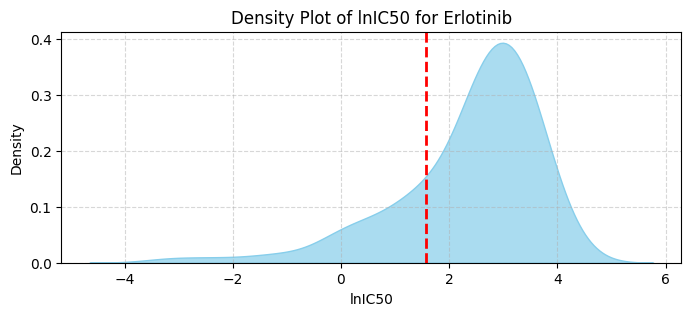

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
erlotinib_lnIC50 = response_df[response_df['drug_name']=="erlotinib"]['lnIC50']
plt.figure(figsize=(8, 3))
sns.kdeplot(erlotinib_lnIC50, fill=True, color="skyblue", alpha=0.7)
plt.axvline(threshold_erlotinib, color='red', linestyle='--', linewidth=2, label=f"Threshold = {threshold_erlotinib}")
plt.title("Density Plot of lnIC50 for Erlotinib")
plt.xlabel("lnIC50")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### split by whole sample

In [4]:
from sklearn.utils import shuffle
CDR = shuffle(response_df,random_state=42) 
print(CDR['Label'].value_counts())
CDR_1 = CDR[CDR['Label']==1]
CDR_0 = CDR[CDR['Label']==0]
ratio = 1 # 1:1 ratio
strategy = 'high'
if strategy == 'high':
        CDR_0 = CDR_0.sort_values('lnIC50', ascending=False).head(ratio * len(CDR_1))
elif strategy == 'low':
        CDR_0 = CDR_0.sort_values('lnIC50', ascending=True).head(ratio * len(CDR_1))
elif strategy == 'random':
        CDR_0 = CDR_0.sample(n= ratio * len(CDR_1), random_state=42) 
elif strategy == 'even':
        CDR_0 = CDR_0.sort_values('lnIC50').reset_index(drop=True) # 按 IC50 升序排序
        n = len(CDR_0)
        target_n = ratio * len(CDR_1) # 目標數量
        # 初步等間距位置（浮點數），再四捨五入成整數索引
        idx = np.linspace(0, n - 1, num=target_n, endpoint=True)
        idx = np.unique(idx.round().astype(int))
        # 若因np.unique四捨五入造成重複，補到剛好 target_n
        if len(idx) < target_n:
                remaining = np.setdiff1d(np.arange(n), idx, assume_unique=True)#計算我們尚未選擇的索引集
                fill_idx = np.linspace(0, len(remaining) - 1, num=target_n - len(idx), endpoint=True).round().astype(int)#需要準確添加 target_n - len（idx） 索引。
                idx = np.r_[idx, remaining[fill_idx]]#將這些均勻選擇的剩餘索引附加（連接）到 idx，以便總數與 target_n 匹配。
        CDR_0 = CDR_0.iloc[idx]
CDR = pd.concat([CDR_0,CDR_1])
CDR = shuffle(CDR,random_state=42) 
print(CDR['Label'].value_counts())
CDR

0    96842
1     8544
Name: Label, dtype: int64
0    8544
1    8544
Name: Label, dtype: int64


,drug_name,Label,drug_name_normalized,mapped_name,lnIC50,primary_disease,ModelID
101115,osi-930,0,osi930,osi-930,5.65,Thyroid Cancer,ACH-001321
94415,cetuximab,0,cetuximab,cetuximab,5.71,Bladder Cancer,ACH-000566
68007,doramapimod,1,doramapimod,doramapimod,2.65,Lung Cancer,ACH-000860
75627,kin001-270,0,kin001270,kin001-270,5.53,Ovarian Cancer,ACH-001373
100665,phenformin,0,phenformin,phenformin,6.72,Ovarian Cancer,ACH-000048
...,...,...,...,...,...,...,...
49188,tubastatin a,1,tubastatina,tubastatin a,3.11,Lung Cancer,ACH-001549
78181,enzastaurin,1,ly317615,enzastaurin,0.73,Pancreatic Cancer,ACH-000235
12922,bexarotene,0,bexarotene,bexarotene,5.70,Ovarian Cancer,ACH-000103
83216,cetuximab,0,cetuximab,cetuximab,7.29,Skin Cancer,ACH-000614


In [5]:
def check_balanced_dataset(balanced_df, name):
    print(f"\n===== {name} =====")
    print("balanced shape:", balanced_df.shape)
    balanced_df['lnIC50'] = pd.to_numeric(balanced_df['lnIC50'], errors='coerce')
    df_0 = balanced_df[balanced_df["Label"] == 0]
    df_1 = balanced_df[balanced_df["Label"] == 1]
    print("\nNegative (Label=0)")
    print("shape:", df_0.shape)
    print("NaN count in lnIC50:", df_0['lnIC50'].isna().sum())
    print(df_0['lnIC50'].describe())
    print("\nPositive (Label=1)")
    print("shape:", df_1.shape)
    print("NaN count in lnIC50:", df_1['lnIC50'].isna().sum())
    print(df_1['lnIC50'].describe())
# 依序檢查三種策略
check_balanced_dataset(CDR, f"{strategy} lnIC50 Sampling")


===== high lnIC50 Sampling =====
balanced shape: (17088, 7)

Negative (Label=0)
shape: (8544, 7)
NaN count in lnIC50: 0
count    8544.000000
mean        6.162556
std         0.947343
min         5.370000
25%         5.590000
50%         5.850000
75%         6.320000
max        12.800000
Name: lnIC50, dtype: float64

Positive (Label=1)
shape: (8544, 7)
NaN count in lnIC50: 0
count    8544.000000
mean        0.169867
std         2.699769
min        -9.830000
25%        -1.350000
50%         0.650000
75%         2.162500
max         6.160000
Name: lnIC50, dtype: float64


In [ ]:
CDR.to_csv("/root/data/GDSC/lorio GDSC1 by whole balanced_even lnIC50 downsample 17088 CCL552drug238cancerType18 stack.csv")

In [14]:
print(CDR['drug_name'].nunique(),CDR['ModelID'].nunique(),CDR['primary_disease'].nunique())

238 558 18


In [15]:
import numpy as np
# 計算每種 drug_name 中 label 為 0 和 1 的樣本數
label_counts = CDR.groupby(['drug_name', 'Label']).size().unstack(fill_value=0)
label_counts.columns = ['Negative (0)', 'Positive (1)']
label_counts['Neg/Pos Ratio'] = (label_counts['Negative (0)'] / label_counts['Positive (1)'].replace(0, np.nan)).round(1)# 新增一欄：Negative / Positive 的比值，避免除以 0 的錯誤
label_counts_sorted = label_counts.sort_values(by='Neg/Pos Ratio', ascending=False)
label_counts_sorted

,Negative (0),Positive (1),Neg/Pos Ratio
drug_name,,,
aica ribonucleotide,444,20,22.2
zibotentan,388,20,19.4
dmog,403,21,19.2
ipa-3,172,12,14.3
phenformin,482,41,11.8
...,...,...,...
linifanib,0,35,0.0
linsitinib,0,56,0.0
luminespib,0,30,0.0


In [16]:
# 計算每種 ModelID 中 label 為 0 和 1 的樣本數
label_counts = CDR.groupby(['ModelID', 'Label']).size().unstack(fill_value=0)
label_counts.columns = ['Negative (0)', 'Positive (1)']
label_counts['Neg/Pos Ratio'] = (label_counts['Negative (0)'] / label_counts['Positive (1)'].replace(0, np.nan)).round(1)# 新增一欄：Negative / Positive 的比值，避免除以 0 的錯誤
label_counts_sorted = label_counts.sort_values(by='Neg/Pos Ratio', ascending=False)
label_counts_sorted

,Negative (0),Positive (1),Neg/Pos Ratio
ModelID,,,
ACH-000475,55,1,55.0
ACH-000724,53,1,53.0
ACH-000186,49,1,49.0
ACH-000818,84,2,42.0
ACH-000332,37,1,37.0
...,...,...,...
ACH-000102,22,0,NaN
ACH-000640,11,0,NaN
ACH-000678,12,0,NaN


In [58]:
# 計算每種 primary_disease 中 label 為 0 和 1 的樣本數
label_counts = CDR.groupby(['primary_disease', 'Label']).size().unstack(fill_value=0)
label_counts.columns = ['Negative (0)', 'Positive (1)']
label_counts['Neg/Pos Ratio'] = (label_counts['Negative (0)'] / label_counts['Positive (1)'].replace(0, np.nan)).round(1)# 新增一欄：Negative / Positive 的比值，避免除以 0 的錯誤
label_counts_sorted = label_counts.sort_values(by='Neg/Pos Ratio', ascending=False)
label_counts_sorted

,Negative (0),Positive (1),Neg/Pos Ratio
primary_disease,,,
Bile Duct Cancer,55,31,1.8
Pancreatic Cancer,555,349,1.6
Breast Cancer,883,540,1.6
Colon/Colorectal Cancer,833,623,1.3
Lung Cancer,2198,1863,1.2
Kidney Cancer,272,237,1.1
Thyroid Cancer,186,177,1.1
Ovarian Cancer,486,474,1.0
Esophageal Cancer,419,464,0.9


### split by ModelID , ModelID balanced (but drugs don't)

In [17]:
label_counts=response_df.groupby(['drug_name', 'Label']).size().unstack(fill_value=0)
label_counts.columns = ['Negative (0)', 'Positive (1)']
label_counts['Neg/Pos Ratio'] = (label_counts['Negative (0)'] / label_counts['Positive (1)'].replace(0, np.nan)).round(1)
label_counts_sorted = label_counts.sort_values(by='drug_name', ascending=False)
label_counts_sorted
# trametinib gsk690693  erlotinib gefitinib 5-fluorouracil

,Negative (0),Positive (1),Neg/Pos Ratio
drug_name,,,
zstk474,517,17,30.4
zm447439,411,23,17.9
zibotentan,515,20,25.8
zg-10,266,16,16.6
z-llnle-cho,127,6,21.2
...,...,...,...
a-770041,83,50,1.7
a-443654,121,12,10.1
I-BET 151,500,31,16.1


In [19]:
def downsample_majority(majority_df, target_n, strategy='high', ic50_col='lnIC50'):
    """
    將多數類別下採樣到 target_n。
        'high'：取 IC50 最大的 target_n 筆
        'low' ：取 IC50 最小的 target_n 筆
        'even'：依 IC50 排序後等間距抽樣 target_n 筆
    """
    if strategy == 'high':
        return majority_df.sort_values(ic50_col, ascending=False).head(target_n)
    elif strategy == 'low':
        return majority_df.sort_values(ic50_col, ascending=True).head(target_n)
    else:  # even
        df_sorted = majority_df.sort_values(ic50_col).reset_index(drop=True) # 按 IC50 升序排序
        n = len(df_sorted)
        # 初步等間距位置（浮點數），再四捨五入成整數索引
        idx = np.linspace(0, n - 1, num=target_n, endpoint=True)
        idx = np.unique(idx.round().astype(int))
        # 若因np.unique四捨五入造成重複，補到剛好 target_n
        if len(idx) < target_n:
            remaining = np.setdiff1d(np.arange(n), idx, assume_unique=True)#計算我們尚未選擇的索引集
            fill_idx = np.linspace(0, len(remaining) - 1, num=target_n - len(idx), endpoint=True).round().astype(int)#需要準確添加 target_n - len（idx） 索引。
            idx = np.r_[idx, remaining[fill_idx]]#將這些均勻選擇的剩餘索引附加（連接）到 idx，以便總數與 target_n 匹配。
        return df_sorted.iloc[idx] # 從排序的多數類中返回均勻間隔的行子集（仍按升序 IC50 順序）。
response_df = response_df[~response_df["Label"].isna()]
df_0 = response_df[response_df["Label"] == 0]
df_1 = response_df[response_df["Label"] == 1]
print("response_df",response_df.shape)
print("df_0",df_0.shape)
print("df_1",df_1.shape)
balanced_dfs_high, balanced_dfs_low, balanced_dfs_even = [], [], []
# 遍歷每個 CCL (ModelID)
for ModelID, group in response_df.groupby("ModelID"):
    count_0 = (group["Label"] == 0).sum()
    # print(f"ModelID: {ModelID}, Count of Label 0: {count_0}")
    count_1 = (group["Label"] == 1).sum()
    # print(f"ModelID: {ModelID}, Count of Label 1: {count_1}")
    if count_1 != 0 and count_0 != 0:
        if count_0 == count_1:
            # 已經平衡，直接保留
            B +=1
            balanced_dfs_high.append(group.copy())
            balanced_dfs_low.append(group.copy())
            balanced_dfs_even.append(group.copy())
            print('count_0 == count_1')            
        else:
            # 判斷誰是少數
            if count_0 < count_1:
                minority = group[group["Label"] == 0]
                majority = group[group["Label"] == 1]
                print("minority0:", minority.shape, "majority1:", majority.shape)
            else:
                minority = group[group["Label"] == 1]
                majority = group[group["Label"] == 0]
            # 三種策略得到三組多數下採樣
            target_n = len(minority)
            maj_high = downsample_majority(majority, target_n, strategy='high', ic50_col='lnIC50')
            maj_low  = downsample_majority(majority, target_n, strategy='low',  ic50_col='lnIC50')
            maj_even = downsample_majority(majority, target_n, strategy='even', ic50_col='lnIC50')
            # 合併（並打亂）
            balanced_dfs_high.append(pd.concat([maj_high, minority], ignore_index=True).sample(frac=1, random_state=42))
            balanced_dfs_low.append(pd.concat([maj_low,  minority], ignore_index=True).sample(frac=1, random_state=42))
            balanced_dfs_even.append(pd.concat([maj_even, minority], ignore_index=True).sample(frac=1, random_state=42))

    elif count_1 == 0:
        print(f"ModelID: {ModelID} has no Label 1, skipping this group.")
        print(count_0)
    elif count_0 == 0:
        print(f"ModelID: {ModelID} has no Label 0, skipping this group.")
        print(count_1)

# 合併各自策略的所有 group
balanced_high = pd.concat(balanced_dfs_high, ignore_index=True)
balanced_low  = pd.concat(balanced_dfs_low,  ignore_index=True)
balanced_even = pd.concat(balanced_dfs_even, ignore_index=True)    

response_df (105386, 7)
df_0 (96842, 7)
df_1 (8544, 7)
ModelID: ACH-000035 has no Label 1, skipping this group.
26
ModelID: ACH-000102 has no Label 1, skipping this group.
182
ModelID: ACH-000640 has no Label 1, skipping this group.
83
ModelID: ACH-000678 has no Label 1, skipping this group.
88
ModelID: ACH-000888 has no Label 1, skipping this group.
149
ModelID: ACH-000916 has no Label 1, skipping this group.
151


In [20]:
for ModelID, group in response_df.groupby("ModelID"):
    print(group['Label'].value_counts())
    print(group)

    break

0    174
1      2
Name: Label, dtype: int64
          drug_name  Label drug_name_normalized   mapped_name  lnIC50  \
76210    bms-536924      0            bms536924    bms-536924    2.86   
76211    gsk269962a      0           gsk269962a    gsk269962a    2.79   
76212   doxorubicin      0          doxorubicin   doxorubicin   -1.05   
76213     etoposide      0            etoposide     etoposide    3.06   
76214   gemcitabine      0          gemcitabine   gemcitabine   -1.51   
...             ...    ...                  ...           ...     ...   
76381    dabrafenib      0           dabrafenib    dabrafenib    5.03   
76382  temozolomide      0         temozolomide  temozolomide    6.25   
76383         sn-38      0                 sn38         sn-38   -5.03   
76384   selumetinib      0          selumetinib   selumetinib    3.94   
76385  pevonedistat      0              mln4924  pevonedistat   -0.10   

      primary_disease     ModelID  
76210  Ovarian Cancer  ACH-000001  
76211  

In [21]:
def check_balanced_dataset(balanced_df, name):
    print(f"\n===== {name} =====")
    print("balanced shape:", balanced_df.shape)
    balanced_df['lnIC50'] = pd.to_numeric(balanced_df['lnIC50'], errors='coerce')
    df_0 = balanced_df[balanced_df["Label"] == 0]
    df_1 = balanced_df[balanced_df["Label"] == 1]
    print("\nNegative (Label=0)")
    print("shape:", df_0.shape)
    print("NaN count in lnIC50:", df_0['lnIC50'].isna().sum())
    print(df_0['lnIC50'].describe())
    print("\nPositive (Label=1)")
    print("shape:", df_1.shape)
    print("NaN count in lnIC50:", df_1['lnIC50'].isna().sum())
    print(df_1['lnIC50'].describe())
# 依序檢查三種策略
check_balanced_dataset(balanced_even, "Even Sampling")
check_balanced_dataset(balanced_high, "High IC50 Sampling")
check_balanced_dataset(balanced_low,  "Low IC50 Sampling")



===== Even Sampling =====
balanced shape: (17088, 7)

Negative (Label=0)
shape: (8544, 7)
NaN count in lnIC50: 0
count    8544.000000
mean        2.086083
std         3.394093
min        -7.510000
25%         0.580000
50%         2.570000
75%         4.112500
max        12.800000
Name: lnIC50, dtype: float64

Positive (Label=1)
shape: (8544, 7)
NaN count in lnIC50: 0
count    8544.000000
mean        0.169867
std         2.699769
min        -9.830000
25%        -1.350000
50%         0.650000
75%         2.162500
max         6.160000
Name: lnIC50, dtype: float64

===== High IC50 Sampling =====
balanced shape: (17088, 7)

Negative (Label=0)
shape: (8544, 7)
NaN count in lnIC50: 0
count    8544.000000
mean        5.486971
std         1.399651
min        -0.660000
25%         4.720000
50%         5.340000
75%         5.990000
max        12.800000
Name: lnIC50, dtype: float64

Positive (Label=1)
shape: (8544, 7)
NaN count in lnIC50: 0
count    8544.000000
mean        0.169867
std         2.

In [204]:
balanced_high['primary_disease'].value_counts()

Lung Cancer                   3726
Skin Cancer                   1438
Sarcoma                       1402
Brain Cancer                  1332
Colon/Colorectal Cancer       1246
Breast Cancer                 1080
Ovarian Cancer                 948
Esophageal Cancer              928
Gastric Cancer                 782
Head and Neck Cancer           706
Pancreatic Cancer              698
Bladder Cancer                 526
Liver Cancer                   514
Kidney Cancer                  474
Endometrial/Uterine Cancer     440
Cervical Cancer                432
Thyroid Cancer                 354
Bile Duct Cancer                62
Name: primary_disease, dtype: int64

In [ ]:
balanced_high['ModelID'].nunique(), balanced_low['ModelID'].nunique(), balanced_even['ModelID'].nunique()
balanced_high['drug_name'].nunique(), balanced_low['drug_name'].nunique(), balanced_even['drug_name'].nunique()
balanced_high['primary_disease'].nunique(), balanced_low['primary_disease'].nunique(), balanced_even['primary_disease'].nunique()

(18, 18, 18)

In [ ]:
balanced_even.to_csv("/root/data/GDSC/lorio GDSC1 balanced_even lnIC50 downsample 17088 CCL552drug238cancerType18 stack.csv")

# 看各個藥的ic50分布 lnIC50->IC50

In [ ]:
balanced_high = pd.read_csv("/root/data/GDSC/lorio GDSC1 balanced_high lnIC50 downsample 17088 CCL552drug238cancerType18 stack.csv", index_col=0, header=0)#
balanced_high

,drug_name,Label,drug_name_normalized,mapped_name,lnIC50,primary_disease,ModelID
0,5-fluorouracil,0,5fluorouracil,5-fluorouracil,6.44,Ovarian Cancer,ACH-000001
1,wee1 inhibitor,1,wee1inhibitor,wee1 inhibitor,0.56,Ovarian Cancer,ACH-000001
2,phenformin,0,phenformin,phenformin,7.47,Ovarian Cancer,ACH-000001
3,akt inhibitor viii,1,aktinhibitorviii,akt inhibitor viii,0.28,Ovarian Cancer,ACH-000001
4,refametinib,1,rdea119,refametinib,-0.44,Colon/Colorectal Cancer,ACH-000007
...,...,...,...,...,...,...,...
17083,as605240,0,as605240,as605240,5.36,Head and Neck Cancer,ACH-002045
17084,gsk690693,1,gsk690693,gsk690693,2.49,Head and Neck Cancer,ACH-002045
17085,tretinoin,1,atra,tretinoin,2.18,Head and Neck Cancer,ACH-002045
17086,ipa-3,0,ipa3,ipa-3,5.55,Head and Neck Cancer,ACH-002045


In [23]:
label_counts = balanced_high.groupby(['drug_name', 'Label']).size().unstack(fill_value=0)
label_counts.columns = ['Negative (0)', 'Positive (1)']
label_counts['Neg/Pos Ratio'] = (label_counts['Negative (0)'] / label_counts['Positive (1)'].replace(0, np.nan)).round(1)
label_counts_sorted = label_counts.sort_values(by='Neg/Pos Ratio', ascending=False)
label_counts_sorted

,Negative (0),Positive (1),Neg/Pos Ratio
drug_name,,,
aica ribonucleotide,437,20,21.8
dmog,392,21,18.7
zibotentan,339,20,17.0
ipa-3,143,12,11.9
phenformin,466,41,11.4
...,...,...,...
gw843682x,0,4,0.0
gsk269962a,1,54,0.0
gsk1904529a,1,62,0.0


In [22]:
balanced_high.groupby(['ModelID', 'Label']).size().unstack(fill_value=0)

Label,0,1
ModelID,,
ACH-000001,2,2
ACH-000007,19,19
ACH-000008,41,41
ACH-000009,16,16
ACH-000012,12,12
...,...,...
ACH-001715,7,7
ACH-001819,10,10
ACH-001861,9,9


In [ ]:
sponse_df= pd.read_csv("/root/data/GDSC/lorio GDSC1 lnIC50 105386 CCL558drug238cancerType18 stack.csv", index_col=0, header=0)#
sponse_df

,drug_name,Label,drug_name_normalized,mapped_name,LNic50,primary_disease,ModelID.1
ModelID,,,,,,,
ACH-000905,bms-536924,0.0,bms536924,bms-536924,2.96,Bladder Cancer,ACH-000905
ACH-000905,gsk269962a,0.0,gsk269962a,gsk269962a,1.10,Bladder Cancer,ACH-000905
ACH-000905,doxorubicin,0.0,doxorubicin,doxorubicin,-3.80,Bladder Cancer,ACH-000905
ACH-000905,etoposide,0.0,etoposide,etoposide,-0.21,Bladder Cancer,ACH-000905
ACH-000905,gemcitabine,0.0,gemcitabine,gemcitabine,-1.23,Bladder Cancer,ACH-000905
...,...,...,...,...,...,...,...
ACH-000828,trametinib,0.0,trametinib,trametinib,3.91,Breast Cancer,ACH-000828
ACH-000828,dabrafenib,0.0,dabrafenib,dabrafenib,5.28,Breast Cancer,ACH-000828
ACH-000828,temozolomide,0.0,temozolomide,temozolomide,7.31,Breast Cancer,ACH-000828


In [7]:
sponse_df.drug_name.nunique(), sponse_df.index.nunique(), sponse_df.primary_disease.nunique()

(238, 558, 18)

In [ ]:
# 計算每種 primary_disease 中 label 為 0 和 1 的樣本數
label_counts = sponse_df.groupby(['drug_name', 'Label']).size().unstack(fill_value=0)
# 選擇性地重新命名欄位以方便閱讀
label_counts.columns = ['Negative (0)', 'Positive (1)']
# 新增一欄：Negative / Positive 的比值，避免除以 0 的錯誤
label_counts['Neg/Pos Ratio'] = (label_counts['Negative (0)'] / label_counts['Positive (1)'].replace(0, np.nan)).round(1)
label_counts_sorted = label_counts.sort_values(by='Neg/Pos Ratio', ascending=False)
# 顯示結果
label_counts_sorted

,Negative (0),Positive (1),Neg/Pos Ratio
drug_name,,,
daporinad,508,2,254.0
s-trityl-l-cysteine,132,1,132.0
snx-2112,527,4,131.8
at-7519,524,6,87.3
osi-027,523,7,74.7
...,...,...,...
y-39983,384,151,2.5
trametinib,326,178,1.8
a-770041,83,50,1.7


In [37]:
sponse_df.groupby(['ModelID', 'Label']).size().unstack(fill_value=0)

Label,0.0,1.0
ModelID,,
ACH-000001,174,2
ACH-000007,220,19
ACH-000008,194,41
ACH-000009,219,16
ACH-000012,180,12
...,...,...
ACH-001715,188,7
ACH-001819,229,10
ACH-001861,226,9
